# Simple Linear Regression in Python (w/o validation)

First of, you need data. For this, I've used data from here:
https://onlinecourses.science.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/data/poverty.txt

Saved and downloaded as .csv.

You can also use datasets from sklearn which are found here:
https://github.com/scikit-learn/scikit-learn/tree/master/sklearn/datasets/data

In [18]:
# first, you will need to import modules from their libraries or libraries itself
# pandas and numpy are libraries commonly used for data analysis and data wrangling
# os is for stuff related to your operating system, in the case finding the default folder
# matplotlib is for plotting graphs in python. the inline line after that is to make the chart appear in your jupyter notebook.
# sklearn is the library I will use for linear regression modelling in this case
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
# now that that logistics is done,
# let's get that data


# first, find your working directory
cwd = os.getcwd()
print(cwd)

/Users/Bernie


In [9]:
# I have a .csv file saved on my desktop in a folder called Writings
# the address is
# Users/Bernie/Desktop/Writings/SLR-data-birthrateUS.csv
# since my working director is in the Bernie location already, I can exclude that from my address

df = pd.read_csv("Desktop/Writings/SLR-data-birthrateUS.csv", sep='\t')
# sep = \t simply means that a tab spacing is a seperator. 
# This is due to the nature of my dataset where the columns are seperated by tabs
# it depends on your dataset. could be a comma [,], could be a pipe [|]. sometimes, the 'sep = ' parameter is not needed

In [10]:
# let's check the data out by viewing the first 5 rows (including the headers)
df.head(6)

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1
5,Colorado,8.8,26.2,79.1,5.8,47.0


In [11]:
# Brth15to17 = birth rate per 1000 females 15 to 17 years old
# PovPct = poverty rate
# In my regression model, I want to see how PovPct (Poverty rate) affects the Brth15to17
# Hence my independant variable (x) will be Poverty and my dependant variable (y) is Brth15to17

# lets get our X and Y
X = df['PovPct'].values
Y = df['Brth15to17'].values

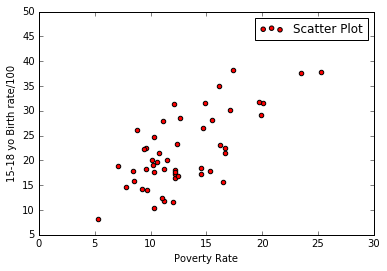

In [15]:
# Let's visualize these two columns of values and see whether a linear regression is viable


# scatter plot of Poverty Rate vs Birth rate per 1000 females aged 15 to 17 
plt.scatter(X, Y, c='red', label='Scatter Plot')
plt.xlabel('Poverty Rate')
plt.ylabel('15-17 yo Birth rate/100')
plt.legend()
plt.show()

In [20]:
# Doesn't look too bad, as Poverty rate increases, so does the birth rate 
# it looks like we could draw a line through it and still get a pretty okay predicitons.
# birth rate does not dropped significantly after going up, so a linear estimation is viable

# LET'S MAKE THE MODEL! 
X = X.reshape(len(X),1)
# Creating regression model using sklearn
reg = LinearRegression()

# Fitting it to X and Y that we defined prevoiusly
reg = reg.fit(X, Y)

# getting our Y Pred / y hat
Y_pred = reg.predict(X)

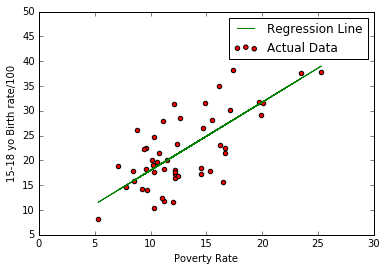

In [21]:
# let's visuzlize our results
plt.plot(X, Y_pred, color='green', label='Regression Line')
plt.scatter(X, Y, c='red', label='Actual Data')

plt.xlabel('Poverty Rate')
plt.ylabel('15-17 yo Birth rate/100')
plt.legend()
plt.show()